# Importing Libraries

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config IPCompleter.greedy=True

import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import math
import matplotlib

from sklearn.metrics import mean_squared_error

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Loading the dataset

From the Feature Selection stage we observed that **item_price** and **shop_id** were the two most important features with their importance being **0.24** and **0.13** respectively.

Hence we shall proceed with the analysis with the above two mentioned features. Loading the processed dataet as below.

In [2]:
dataset = pd.read_csv("drive/Colab Notebooks/sales_train_processed.csv")
dataset['date'] = pd.to_datetime(dataset['date'], format = '%Y-%m-%d')
dataset.head(10)
dataset.dtypes

,date,quarter,year,date_block_num,shop_id,shop_name,item_id,item_name,item_category_id,item_category,city,item_price,item_cnt_day
0,2013-10-12,4,2013,9,25,"""Moscow TRK """"Atrium""""""",11574,FACTORY ORANGE (region),40,Cinema - DVD,Moscow,149.0,1.0
1,2013-10-07,4,2013,9,25,"""Moscow TRK """"Atrium""""""",11568,FOR SPEECH (region),40,Cinema - DVD,Moscow,149.0,1.0
2,2013-10-05,4,2013,9,25,"""Moscow TRK """"Atrium""""""",11645,PROTECTION (BD),37,Cinema - Blu-ray,Moscow,149.0,1.0
3,2013-10-10,4,2013,9,25,"""Moscow TRK """"Atrium""""""",11679,MUSIC SOUNDS (BD),37,Cinema - Blu-ray,Moscow,299.0,1.0
4,2013-10-20,4,2013,9,25,"""Moscow TRK """"Atrium""""""",11658,STAR WARS. EPISODE 1-3 (call) 2013,41,Cinema - Collection,Moscow,499.0,2.0
5,2013-10-11,4,2013,9,25,"""Moscow TRK """"Atrium""""""",11658,STAR WARS. EPISODE 1-3 (call) 2013,41,Cinema - Collection,Moscow,499.0,1.0
6,2013-10-09,4,2013,9,25,"""Moscow TRK """"Atrium""""""",11658,STAR WARS. EPISODE 1-3 (call) 2013,41,Cinema - Collection,Moscow,499.0,1.0
7,2013-10-05,4,2013,9,25,"""Moscow TRK """"Atrium""""""",11658,STAR WARS. EPISODE 1-3 (call) 2013,41,Cinema - Collection,Moscow,499.0,1.0
8,2013-10-23,4,2013,9,25,"""Moscow TRK """"Atrium""""""",12033,IRONY OF DESTINY OR WITH EASY BATH (region),40,Cinema - DVD,Moscow,149.0,1.0
9,2013-10-22,4,2013,9,25,"""Moscow TRK """"Atrium""""""",12033,IRONY OF DESTINY OR WITH EASY BATH (region),40,Cinema - DVD,Moscow,149.0,1.0


date                datetime64[ns]
quarter                      int64
year                         int64
date_block_num               int64
shop_id                      int64
shop_name                   object
item_id                      int64
item_name                   object
item_category_id             int64
item_category               object
city                        object
item_price                 float64
item_cnt_day               float64
dtype: object

In [3]:
# Parsing the date as datettime format and setting the 'date' column as the index
date_index = pd.DatetimeIndex(dataset['date'])
dataset.drop('date', axis = 1)
dataset.set_index(date_index)
dataset['month_year'] = dataset.date.dt.to_period('M')

#dataset['month_year'] = pd.to_datetime(dataset['month_year'], format = '%Y-%m')
dataset.head(2)

,quarter,year,date_block_num,shop_id,shop_name,item_id,item_name,item_category_id,item_category,city,item_price,item_cnt_day
0,4,2013,9,25,"""Moscow TRK """"Atrium""""""",11574,FACTORY ORANGE (region),40,Cinema - DVD,Moscow,149.0,1.0
1,4,2013,9,25,"""Moscow TRK """"Atrium""""""",11568,FOR SPEECH (region),40,Cinema - DVD,Moscow,149.0,1.0
2,4,2013,9,25,"""Moscow TRK """"Atrium""""""",11645,PROTECTION (BD),37,Cinema - Blu-ray,Moscow,149.0,1.0
3,4,2013,9,25,"""Moscow TRK """"Atrium""""""",11679,MUSIC SOUNDS (BD),37,Cinema - Blu-ray,Moscow,299.0,1.0
4,4,2013,9,25,"""Moscow TRK """"Atrium""""""",11658,STAR WARS. EPISODE 1-3 (call) 2013,41,Cinema - Collection,Moscow,499.0,2.0
5,4,2013,9,25,"""Moscow TRK """"Atrium""""""",11658,STAR WARS. EPISODE 1-3 (call) 2013,41,Cinema - Collection,Moscow,499.0,1.0
6,4,2013,9,25,"""Moscow TRK """"Atrium""""""",11658,STAR WARS. EPISODE 1-3 (call) 2013,41,Cinema - Collection,Moscow,499.0,1.0
7,4,2013,9,25,"""Moscow TRK """"Atrium""""""",11658,STAR WARS. EPISODE 1-3 (call) 2013,41,Cinema - Collection,Moscow,499.0,1.0
8,4,2013,9,25,"""Moscow TRK """"Atrium""""""",12033,IRONY OF DESTINY OR WITH EASY BATH (region),40,Cinema - DVD,Moscow,149.0,1.0
9,4,2013,9,25,"""Moscow TRK """"Atrium""""""",12033,IRONY OF DESTINY OR WITH EASY BATH (region),40,Cinema - DVD,Moscow,149.0,1.0


,date,quarter,year,date_block_num,shop_id,shop_name,item_id,item_name,item_category_id,item_category,city,item_price,item_cnt_day
date,,,,,,,,,,,,,
2013-10-12,2013-10-12,4,2013,9,25,"""Moscow TRK """"Atrium""""""",11574,FACTORY ORANGE (region),40,Cinema - DVD,Moscow,149.0,1.0
2013-10-07,2013-10-07,4,2013,9,25,"""Moscow TRK """"Atrium""""""",11568,FOR SPEECH (region),40,Cinema - DVD,Moscow,149.0,1.0
2013-10-05,2013-10-05,4,2013,9,25,"""Moscow TRK """"Atrium""""""",11645,PROTECTION (BD),37,Cinema - Blu-ray,Moscow,149.0,1.0
2013-10-10,2013-10-10,4,2013,9,25,"""Moscow TRK """"Atrium""""""",11679,MUSIC SOUNDS (BD),37,Cinema - Blu-ray,Moscow,299.0,1.0
2013-10-20,2013-10-20,4,2013,9,25,"""Moscow TRK """"Atrium""""""",11658,STAR WARS. EPISODE 1-3 (call) 2013,41,Cinema - Collection,Moscow,499.0,2.0
2013-10-11,2013-10-11,4,2013,9,25,"""Moscow TRK """"Atrium""""""",11658,STAR WARS. EPISODE 1-3 (call) 2013,41,Cinema - Collection,Moscow,499.0,1.0
2013-10-09,2013-10-09,4,2013,9,25,"""Moscow TRK """"Atrium""""""",11658,STAR WARS. EPISODE 1-3 (call) 2013,41,Cinema - Collection,Moscow,499.0,1.0
2013-10-05,2013-10-05,4,2013,9,25,"""Moscow TRK """"Atrium""""""",11658,STAR WARS. EPISODE 1-3 (call) 2013,41,Cinema - Collection,Moscow,499.0,1.0
2013-10-23,2013-10-23,4,2013,9,25,"""Moscow TRK """"Atrium""""""",12033,IRONY OF DESTINY OR WITH EASY BATH (region),40,Cinema - DVD,Moscow,149.0,1.0


,date,quarter,year,date_block_num,shop_id,shop_name,item_id,item_name,item_category_id,item_category,city,item_price,item_cnt_day,month_year
0,2013-10-12,4,2013,9,25,"""Moscow TRK """"Atrium""""""",11574,FACTORY ORANGE (region),40,Cinema - DVD,Moscow,149.0,1.0,2013-10
1,2013-10-07,4,2013,9,25,"""Moscow TRK """"Atrium""""""",11568,FOR SPEECH (region),40,Cinema - DVD,Moscow,149.0,1.0,2013-10


In [4]:
print("Printing first 5 date entries:\n")
dataset.head(5)
print("\nPrinting last 5 date entries:\n")
dataset.tail(5)

Printing first 5 date entries:



,date,quarter,year,date_block_num,shop_id,shop_name,item_id,item_name,item_category_id,item_category,city,item_price,item_cnt_day,month_year
0,2013-10-12,4,2013,9,25,"""Moscow TRK """"Atrium""""""",11574,FACTORY ORANGE (region),40,Cinema - DVD,Moscow,149.0,1.0,2013-10
1,2013-10-07,4,2013,9,25,"""Moscow TRK """"Atrium""""""",11568,FOR SPEECH (region),40,Cinema - DVD,Moscow,149.0,1.0,2013-10
2,2013-10-05,4,2013,9,25,"""Moscow TRK """"Atrium""""""",11645,PROTECTION (BD),37,Cinema - Blu-ray,Moscow,149.0,1.0,2013-10
3,2013-10-10,4,2013,9,25,"""Moscow TRK """"Atrium""""""",11679,MUSIC SOUNDS (BD),37,Cinema - Blu-ray,Moscow,299.0,1.0,2013-10
4,2013-10-20,4,2013,9,25,"""Moscow TRK """"Atrium""""""",11658,STAR WARS. EPISODE 1-3 (call) 2013,41,Cinema - Collection,Moscow,499.0,2.0,2013-10



Printing last 5 date entries:



,date,quarter,year,date_block_num,shop_id,shop_name,item_id,item_name,item_category_id,item_category,city,item_price,item_cnt_day,month_year
2935844,2015-10-09,4,2015,33,25,"""Moscow TRK """"Atrium""""""",5169,Nanoblock St. Basil's Cathedral,67,Gifts - Development,Moscow,749.0,1.0,2015-10
2935845,2015-10-26,4,2015,33,25,"""Moscow TRK """"Atrium""""""",5183,Nanoblock Titanic,67,Gifts - Development,Moscow,6899.0,1.0,2015-10
2935846,2015-10-24,4,2015,33,25,"""Moscow TRK """"Atrium""""""",5184,Nanoblock Ð¢Ñ€Ð¸ÑƒÐ¼Ñ„Ð°Ð»ÑŒÐ½Ð°Ñ Ð°Ñ€ÐºÐ°,67,Gifts - Development,Moscow,1099.0,1.0,2015-10
2935847,2015-10-12,4,2015,33,25,"""Moscow TRK """"Atrium""""""",5189,Nanoblock Eiffel Tower,67,Gifts - Development,Moscow,1199.0,1.0,2015-10
2935848,2015-10-11,4,2015,33,25,"""Moscow TRK """"Atrium""""""",5191,Nanoblock Empire State Building,67,Gifts - Development,Moscow,1599.0,2.0,2015-10


From the above output we can see the entire dataset is sorted according to the dates the sales have been made.

Where the last sale has been made on **2015-10-11**.

# Analysis of Assumptions

,item_category_id,date,quarter,year,date_block_num,shop_id,shop_name,item_id,item_name,item_category,city,item_price,item_cnt_day,month_year
0,40,564652,564652,564652,564652,564652,564652,564652,564652,564652,564652,564652,564652,564652
1,30,351591,351591,351591,351591,351591,351591,351591,351591,351591,351591,351591,351591,351591
2,55,339585,339585,339585,339585,339585,339585,339585,339585,339585,339585,339585,339585,339585
3,19,208219,208219,208219,208219,208219,208219,208219,208219,208219,208219,208219,208219,208219
4,37,192674,192674,192674,192674,192674,192674,192674,192674,192674,192674,192674,192674,192674
5,23,146789,146789,146789,146789,146789,146789,146789,146789,146789,146789,146789,146789,146789
6,28,121539,121539,121539,121539,121539,121539,121539,121539,121539,121539,121539,121539,121539
7,20,79058,79058,79058,79058,79058,79058,79058,79058,79058,79058,79058,79058,79058
8,63,53845,53845,53845,53845,53845,53845,53845,53845,53845,53845,53845,53845,53845
9,65,53227,53227,53227,53227,53227,53227,53227,53227,53227,53227,53227,53227,53227


<Figure size 576x288 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5, 1.0, 'Items per Category')

Text(0, 0.5, '# of items sold')

Text(0.5, 0, 'Category')

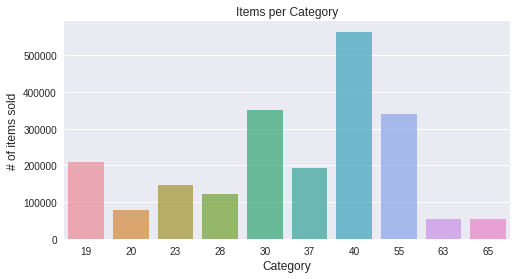

In [5]:
# Number of items per category
x=dataset.groupby(['item_category_id']).count()
x=x.sort_values(by='item_id',ascending=False)
x=x.iloc[0:10].reset_index()
x
# Plot
plt.figure(figsize=(8,4))
ax = sns.barplot(x.item_category_id, x.item_id, alpha=0.8)
plt.title("Items per Category")
plt.ylabel('# of items sold', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.show()

Single series:
----------------

The objective requires us to predict sales for the next month at a store-item combination.

Sales over time of each store-item is a time-series in itself. Before we dive into all the combinations, first let's understand how to forecast for a single series.

I've chosen to predict for the total sales per month for the entire company.

First let's compute the total sales per month and plot that data.

date_block_num
0     131479.0
1     128090.0
2     147142.0
3     107190.0
4     106970.0
5     125381.0
6     116966.0
7     125291.0
8     133332.0
9     127541.0
10    130009.0
11    183342.0
12    116899.0
13    109687.0
14    115297.0
15     96556.0
16     97790.0
17     97429.0
18     91280.0
19    102721.0
20     99208.0
21    107422.0
22    117845.0
23    168755.0
24    110971.0
25     84198.0
26     82014.0
27     77827.0
28     72295.0
29     64114.0
30     63187.0
31     66079.0
32     72843.0
33     71056.0
Name: item_cnt_day, dtype: float64

Text(0.5, 1.0, 'Total Sales of the company')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Sales')

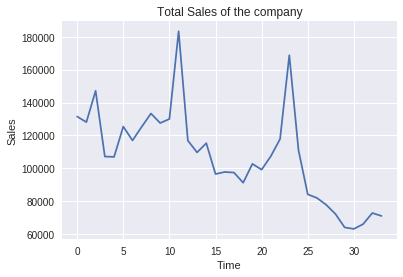

In [6]:
# Plotting the trend of the Items sold throughout given time
ts=dataset.groupby(["date_block_num"])["item_cnt_day"].sum()
ts.astype('float')
#ax = plt.figure(figsize=(16,20))
plt.title('Total Sales of the company')
plt.xlabel('Time')
plt.ylabel('Sales')
#plt.xticks(ticks = ts.values, labels=ts.index)
plt.plot(ts)
#ts.index

<Figure size 1152x432 with 0 Axes>

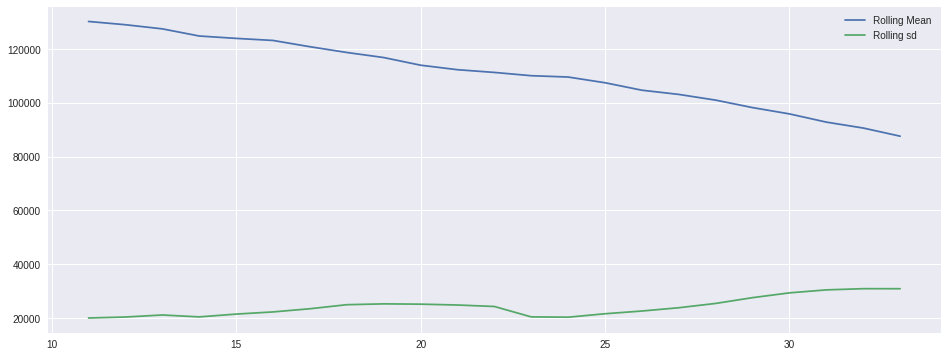

In [7]:
# Plotting the rolling mean and rolling standard deviation with window size as 12 months
plt.figure(figsize=(16,6))
plt.plot(ts.rolling(window=12).mean(),label='Rolling Mean')
plt.plot(ts.rolling(window=12).std(),label='Rolling sd')
plt.legend()

Looking at the above plots of the Trend and Rolling statistics, we can see that there is obviously some seasonality (E.g. Peak sales around a time of the year).

However, overall we can see a decreasing trend in the sales in the latest year.

Checking additive seasonality:
-----------------------------------
For instance, for monthly data, an additive model assumes that the difference between the January and July values is approximately the same each year. In other words, the amplitude of the seasonal effect is the same each year.

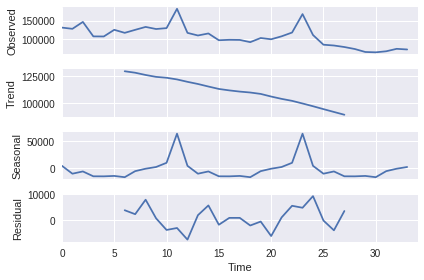

In [8]:
res = sm.tsa.seasonal_decompose(ts.values,freq=12,model="additive")
fig = res.plot()

Checking multiplicative seasonality:
---------------------------------------------

For instance, in seasonal data, it might be more useful to model that the July value is the same proportion higher than the January value in each year, rather than assuming that their difference is constant. Assuming that the seasonal and other effects act proportionally on the series is equivalent to a multiplicative model,



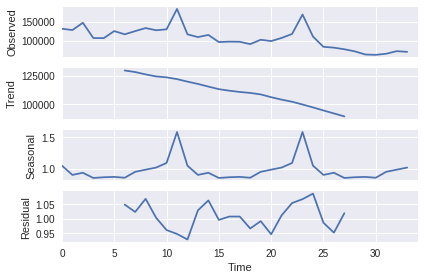

In [9]:
res = sm.tsa.seasonal_decompose(ts.values,freq=12,model="multiplicative")
fig = res.plot()

Testing Stationarity:
--------------------------
For AR, MA and ARIMA models, they work on the assumption of stationarity of mean and standard deviation. Meaning, the mean and standard deviation should not be a function of time.

We use Dickey-Fuller test to test stationarity.

The Null hypothesis of Dickey-Fuller test is that the Time-Series is non-stationary.

In [10]:
# Stationarity tests
def test_stationarity(timeseries):
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

test_stationarity(ts)

Results of Dickey-Fuller Test:
Test Statistic                 -2.395704
p-value                         0.142953
#Lags Used                      0.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64


From the above ADF test results, the p-value is 0.14. That means at 5% level of significance we fail to reject the null hypothesis. The data is non-stationary.

Hence we will difference the time series by 1 lag and try the test again.

<Figure size 1152x1152 with 0 Axes>

Text(0.5, 1.0, 'Original')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Sales')

Text(0.5, 1.0, 'After De-trend')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Sales')

[]

Text(0.5, 1.0, 'After De-seasonalization')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Sales')

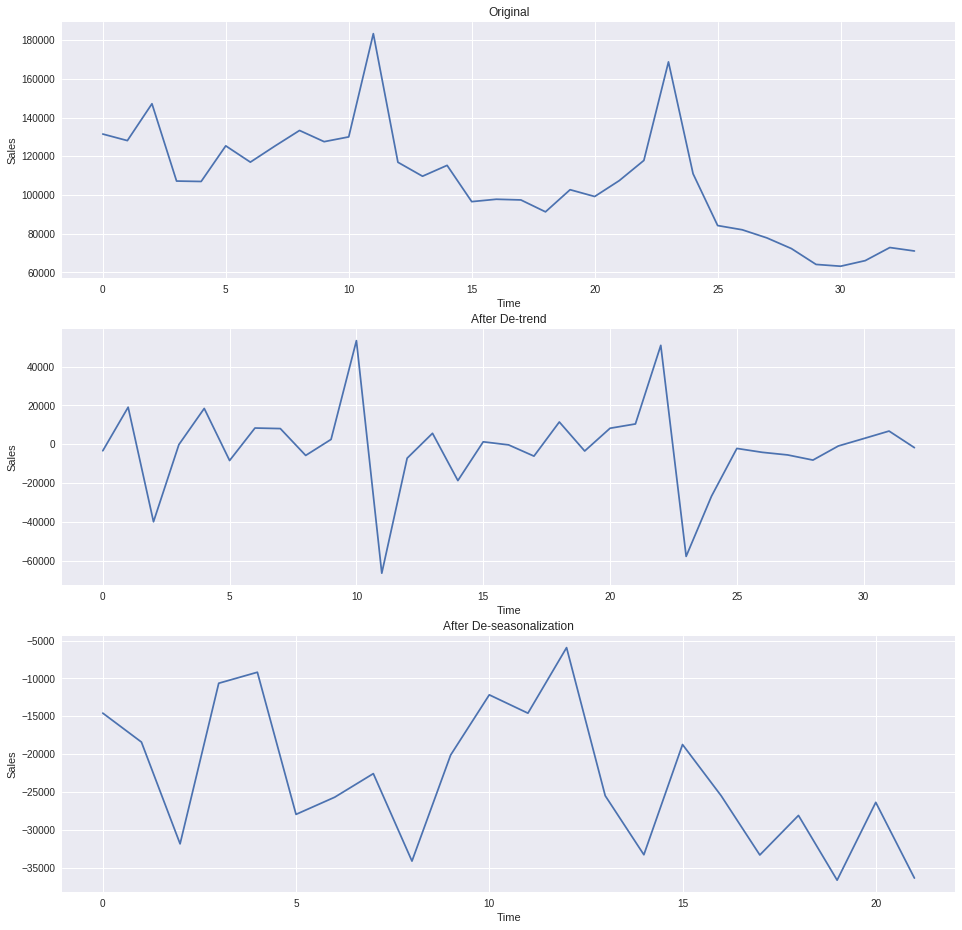

In [11]:
# Function to create differenced time series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return pd.Series(diff)

# To get back the original time series  
def inverse_difference(last_ob, value):
	return value + last_ob

plt.figure(figsize=(16,16))
plt.subplot(311)
plt.title('Original')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(ts)
plt.subplot(312)
plt.title('After De-trend')
plt.xlabel('Time')
plt.ylabel('Sales')
new_ts=difference(ts) # De-Trending the dataset, that is, differencing the data by lag=1
plt.plot(new_ts)
plt.plot()

plt.subplot(313)
plt.title('After De-seasonalization')
plt.xlabel('Time')
plt.ylabel('Sales')
# Assuming the seasonality is 12 months long
new_ts=difference(ts,12)       
plt.plot(new_ts)

In [12]:
# Now testing the stationarity again after de-seasonality
test_stationarity(new_ts)

Results of Dickey-Fuller Test:
Test Statistic                 -3.270101
p-value                         0.016269
#Lags Used                      0.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


Now after the transformations, our p-value for the DF test is well within 5 %. Hence we can assume stationarity of the data.

# Choosing the best ARIMA model:


We shall choose a model of the order of ARIMA(P, D, Q), where P = autoregressive lags, D = order of differencing the time series, Q = moving averages.

We shall choose a model iteratively, and pick the parameters where our AIC value is the lowest.

In [13]:
# Pick best order by aic, model for which smallest AIC value is obtained that is chosen

best_aic = np.inf 
best_order = None
best_model = None

for i in range(0, 6):
    for k in range(0, 3):
        for j in range(0, 6):
            try:
                tmp_model = smt.ARIMA(new_ts.values, order=(i,k,j)).fit(method='mle', trend='nc')
                tmp_aic = tmp_model.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, k, j)
                    best_model = tmp_model
            except: continue


#print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1127: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib

In [14]:
print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))

aic: 433.79487 | order: (2, 2, 2)


We have obtained the best parameter values for our ARIMA model.
P = 2, D = 2 and Q = 2.

In [15]:
print(best_model.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   20
Model:                 ARIMA(2, 2, 2)   Log Likelihood                -211.897
Method:                           mle   S.D. of innovations           8475.329
Date:                Sat, 23 Mar 2019   AIC                            433.795
Time:                        02:27:12   BIC                            438.774
Sample:                             2   HQIC                           434.767
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D2.y    -0.9105      0.216     -4.216      0.001      -1.334      -0.487
ar.L2.D2.y    -0.6673      0.175     -3.819      0.002      -1.010      -0.325
ma.L1.D2.y    -0.3348      0.327     -1.024      0.3

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


# Model Predictions

Making In-Sample Prediction:
-----------------------------------

We shall make the predictions of the observations that are within our dataset and evaluate how accurately our model performs.

After In-sample prediction evaluation we shall move ahead with out of sample predictions.

In [16]:
# Our new_ts, that is, our differenced time series data has been differenced by a factor of D=2
# we shall predict from index = 2 till the end of the sample observations length of data.
in_pred = best_model.predict(start = 2)
in_pred

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


array([     0.        ,   4670.99270614, -22458.86742157, -10623.69346749,
        31371.47774199,    323.28164876,  -9341.17619376,  13545.01966574,
       -12965.44379971, -20068.67297402,   7106.08454545,  -9932.26439782,
        20502.98756144,  21522.76685398, -23053.40188985,   3523.42451632,
        15359.85285926,  -7677.06959698,   6990.59507645,  -7468.26623601])

Validating the predited values of in-samples with the original sales data:
------------

We shall validate the predicted the data after applyinf the inverse_differenced function and comparing this inversed data with values corresponding to date_block_num 14 onwards.

In [0]:
# Inversing the predicted data by de-seasonalizing
expected_val = np.array(ts[14:])
predicted_val = np.array(in_pred)
inversed = [expected_val[i] - predicted_val[i] for i in range(0, len(predicted_val))]

In [18]:
# Checking RMSE of the predicted value
RMSE = math.sqrt(mean_squared_error(expected_val, inversed))
print("\n Root Mean Squared Error of ARIMA (2,2,2): %d" % RMSE)


 Root Mean Squared Error of ARIMA (2,2,2): 14901


<Figure size 1440x720 with 0 Axes>

Text(0.5, 1.0, 'Predicted Values vs Expected Values (in-samples)')

Text(0.5, 0, 'date_block_num')

Text(0, 0.5, '# of Sales')

([<matplotlib.axis.XTick at 0x7f0be771beb8>,
 <a list of 9 Text xticklabel objects>)

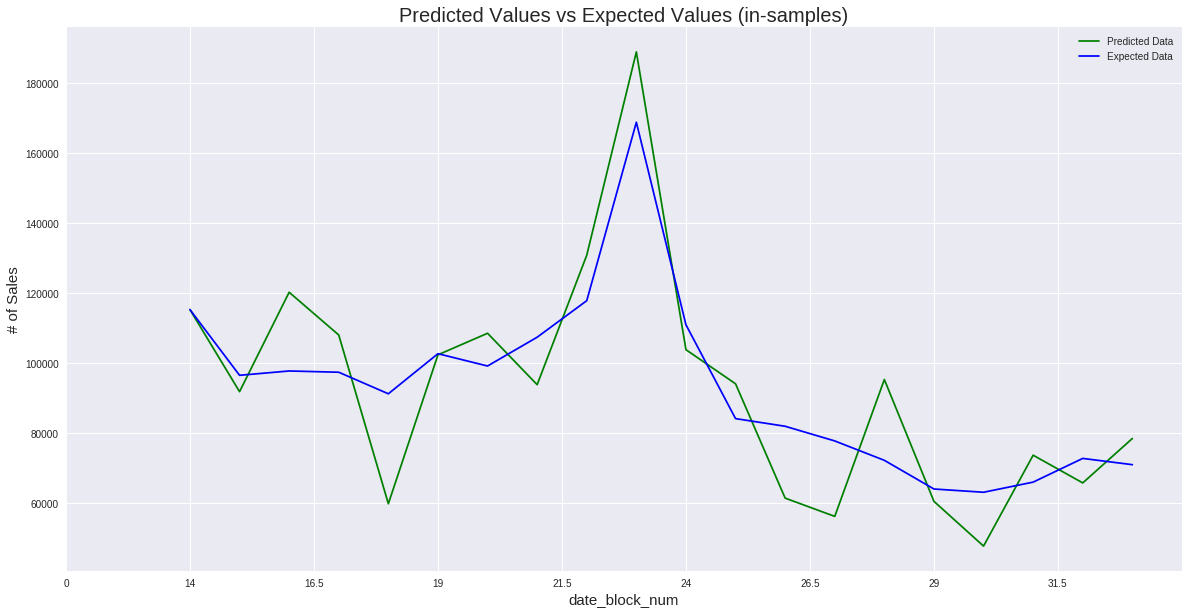

In [20]:
# Plotting the predicted results and compare with original results
plt.figure(figsize = (20,10))
plt.title("Predicted Values vs Expected Values (in-samples)", fontsize = 20)
plt.plot(inversed, color = 'green', label = 'Predicted Data')
plt.plot(expected_val, color = 'blue', label = 'Expected Data')
plt.xlabel("date_block_num", fontsize = 15)
plt.ylabel("# of Sales", fontsize = 15)
locs, labels = plt.xticks()
plt.xticks(locs, labels=[0, 14, 16.5, 19, 21.5, 24, 26.5, 29, 31.5])
plt.legend(loc = 'best')
#plt.show()

Making out-sample predictions:
---------------------------
We shall now forecast the sales values for 4 months ahead of time and see what values our model predicts.

In [21]:
# Using ARIMA.forecast() function to predict the overall sales for next 4 months within 95% confidence intervals
out_pred = best_model.forecast(4)[0]
out_pred

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


array([-44046.37367276, -31791.7062808 , -39237.24269827, -42048.67444164])

Plotting the out-samples predictions for next 4 months:
------------------


In [0]:
# inversing the predicted data
expected_val = np.array(ts)
predicted_val = np.array(out_pred)
inversed = [expected_val[i] - predicted_val[i] for i in range(0, len(predicted_val))]

In [23]:
extended_predicted = np.append(np.append(np.repeat(np.nan, len(expected_val) - 1), expected_val[-1]), inversed) 
# Predicted values with NaN padding to match the length of the original data
extended_predicted 

array([            nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,  71056.        , 175525.37367276, 159881.7062808 ,
       186379.24269827, 149238.67444164])

<Figure size 1440x720 with 0 Axes>

Text(0.5, 1.0, 'Predicted Forecast')

Text(0.5, 0, 'date_block')

Text(0, 0.5, '# of Sales')

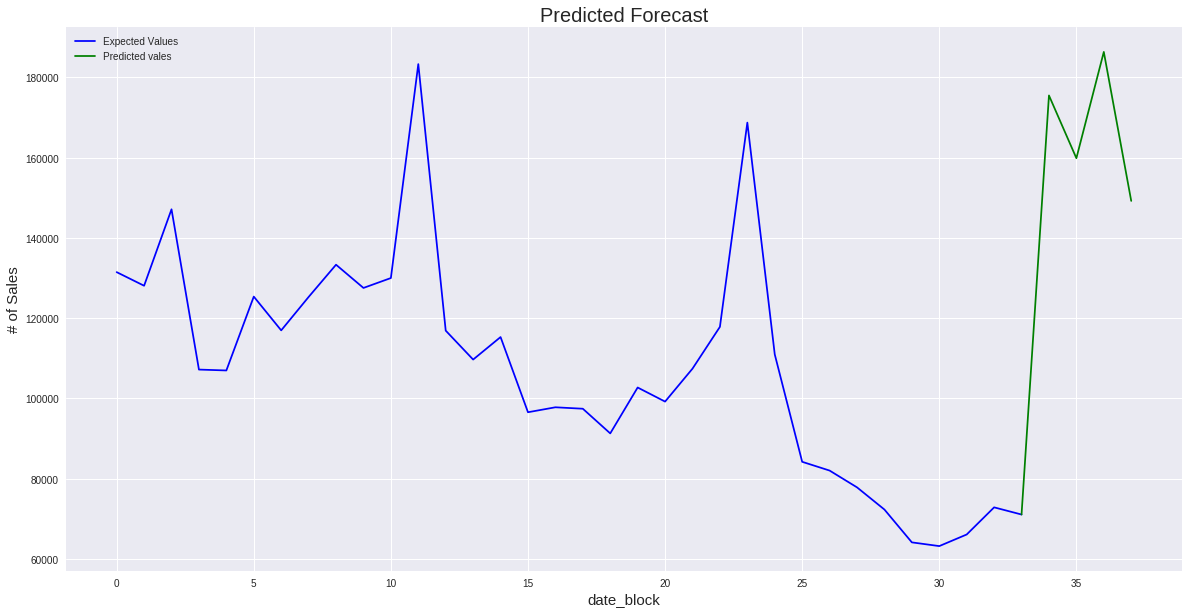

In [24]:
plt.figure(figsize = (20, 10))
plt.title("Predicted Forecast", fontsize = 20)
plt.xlabel("date_block", fontsize = 15)
plt.ylabel("# of Sales", fontsize = 15)
plt.plot(expected_val, color = 'blue', label = 'Expected Values')
plt.plot(extended_predicted, color = 'green', label = 'Predicted vales')
plt.legend()
plt.show()

# Hierarchical Forecast for a store-level


We need to disaggregated forecasts based on disaggregated time series, and we usually require the forecasts to add up in the same way as the data. In other words, forecasts of individual store sales should add up to give forecasts of overall firm's sales.

To achieve this we shall rearrange our dataset ordered by the **date_block_num** and **shop_id** so that we have the sum of sales of individual stores for the respective date_block_num.

In [25]:
# Re-arranging the dataset to be grouped by date_block_num with respect to corresponding shop_id
store_monthly_sales = dataset.groupby(['shop_id', 'date_block_num'])['item_cnt_day'].sum()
store_monthly_sales=store_monthly_sales.unstack(level=-1).fillna(0)
store_monthly_sales = store_monthly_sales.T
store_monthly_sales.shape
store_monthly_sales

# Dis-aggregating the sales of shops with shop_id 51, 52, 53, 54, 55
shop51_sales = store_monthly_sales[51]
shop52_sales = store_monthly_sales[52]
shop53_sales = store_monthly_sales[53]
shop54_sales = store_monthly_sales[54]
shop55_sales = store_monthly_sales[55]
#store_monthly_sales

(34, 60)

shop_id,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
date_block_num,,,,,,,,,,,,,,,,,,,,,
0,5578.0,2947.0,1146.0,767.0,2114.0,0.0,3686.0,2495.0,1463.0,0.0,...,3406.0,2748.0,1812.0,2055.0,9386.0,0.0,3238.0,0.0,0.0,2017.0
1,6127.0,3364.0,488.0,798.0,2025.0,877.0,4007.0,2513.0,1156.0,0.0,...,3054.0,2284.0,1737.0,1906.0,8075.0,0.0,2655.0,0.0,0.0,1897.0
2,0.0,0.0,753.0,959.0,2060.0,1355.0,4519.0,2460.0,977.0,0.0,...,3610.0,2605.0,2034.0,2365.0,9488.0,0.0,3099.0,6586.0,3773.0,2028.0
3,0.0,0.0,583.0,647.0,285.0,1008.0,3168.0,1540.0,-1.0,0.0,...,2740.0,1945.0,1446.0,1515.0,6726.0,0.0,2153.0,5493.0,2831.0,1388.0
4,0.0,0.0,553.0,710.0,1211.0,1110.0,3022.0,1647.0,0.0,0.0,...,2839.0,2243.0,1482.0,1767.0,7006.0,852.0,2140.0,5233.0,2308.0,1374.0
5,0.0,0.0,832.0,784.0,1464.0,1393.0,3847.0,2085.0,0.0,0.0,...,3761.0,2200.0,1815.0,2125.0,8101.0,728.0,3105.0,5987.0,2972.0,1707.0
6,0.0,0.0,807.0,721.0,1378.0,1265.0,3360.0,2031.0,0.0,0.0,...,3235.0,2273.0,1616.0,1975.0,7225.0,795.0,3294.0,5827.0,3122.0,1747.0
7,0.0,0.0,875.0,890.0,1713.0,1510.0,3702.0,2397.0,0.0,0.0,...,3718.0,2142.0,1772.0,2367.0,7792.0,719.0,3311.0,5413.0,2863.0,2048.0
8,0.0,0.0,945.0,1026.0,1536.0,1298.0,4208.0,2599.0,0.0,0.0,...,3655.0,1903.0,2125.0,2440.0,7827.0,812.0,2829.0,5213.0,2735.0,2008.0


In [26]:
# Creating list of shops 51, 52, 53, 54, 55 sales sums
shop_list = [shop51_sales, shop52_sales, shop53_sales, shop54_sales, shop55_sales]
shop_list[0]
#type(store_monthly_sales[51])

date_block_num
0     2748.0
1     2284.0
2     2605.0
3     1945.0
4     2243.0
5     2200.0
6     2273.0
7     2142.0
8     1903.0
9     1809.0
10    1783.0
11    2242.0
12    1623.0
13    1380.0
14    1582.0
15    1432.0
16    1226.0
17    1252.0
18    1342.0
19    1371.0
20    1106.0
21    1154.0
22    1090.0
23    1652.0
24     976.0
25     660.0
26     545.0
27     494.0
28     758.0
29     659.0
30     748.0
31     916.0
32     624.0
33       0.0
Name: 51, dtype: float64

Testing Stationarity:
-----------------
We shall do a stationarity test on each stores with shop_id 51, 52, 53, 54, 55.

In [27]:
# Stationarity tests
def test_stationarity(timeseries):
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    print("\n")

for i in range(0, len(shop_list)):
  print("\nDicker - Fuller Test Results of Shop %d\n" % (i+51))
  test_stationarity(shop_list[i])


Dicker - Fuller Test Results of Shop 51

Results of Dickey-Fuller Test:
Test Statistic                 -1.218641
p-value                         0.665526
#Lags Used                      0.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64



Dicker - Fuller Test Results of Shop 52

Results of Dickey-Fuller Test:
Test Statistic                  0.058921
p-value                         0.963142
#Lags Used                      8.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64



Dicker - Fuller Test Results of Shop 53

Results of Dickey-Fuller Test:
Test Statistic                 -2.229399
p-value                         0.195749
#Lags Used                      0.000000
Number of Observations Used    33.000000
Critical 

From the results above we see that all the shops sales time-series failed to reject the null-hypothesis of non-stationarity of the data.

Hence we shall try differencing the data and test for stationarity again.

In [0]:
new_ts_shop = shop_list
for i in range(0, 5):
  new_ts_shop[i] = difference(shop_list[i], 12)
#new_ts_shop[0]

In [29]:
# Performing Dickey-Fuller Test after differencing the sales values by 12 months
for i in range(0, len(new_ts_shop)):
  print("\nDicker - Fuller Test Results of Shop %d\n" % (i+51))
  test_stationarity(new_ts_shop[i])


Dicker - Fuller Test Results of Shop 51

Results of Dickey-Fuller Test:
Test Statistic                 -1.531224
p-value                         0.518013
#Lags Used                      9.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64



Dicker - Fuller Test Results of Shop 52

Results of Dickey-Fuller Test:
Test Statistic                 -3.987553
p-value                         0.001477
#Lags Used                      0.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64



Dicker - Fuller Test Results of Shop 53

Results of Dickey-Fuller Test:
Test Statistic                 -2.303143
p-value                         0.170956
#Lags Used                      8.000000
Number of Observations Used    13.000000
Critical 

From the above Dickey-Fuller Test Results, we see that only shop 52 after differencing satisfies the stationarity condition. Therefore, for our analysis we shall proceed with shop 52 sales values as of now.

Choosing shops to perform store-level time series analysis:
-------------
We shall arbitrarily choose shops with IDs 51, 52, 53, 54 and 55, and perform time-series analysis on them by choosing a best ARIMA model for each shop.

In [30]:
# For shop 52 pick best order by aic, model for which smallest AIC value is 
# obtained that is chosen

best_aic_shop = np.inf
best_order_shop = None
best_model_shop = None

for i in range(0, 6):
    for k in range(0, 3):
        for j in range(0, 6):
            try:
                tmp_model = smt.ARIMA(new_ts_shop[1].values, order=(i,k,j)).fit(method='mle', trend='nc')
                tmp_aic = tmp_model.aic
                if tmp_aic < best_aic_shop:
                    best_aic_shop = tmp_aic
                    best_order_shop = (i, k, j)
                    best_model_shop = tmp_model
            except: continue


#print('aic: {:6.5f} | order: {}'.format(best_aic_shop, best_order_shop))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retval

In [31]:
print("Best ARIMA model for shop 52:\n")
print("-----------------------------\n")
print('aic: {:6.5f} | order: {}'.format(best_aic_shop, best_order_shop))

Best ARIMA model for shop 52:

-----------------------------

aic: 286.31675 | order: (3, 2, 1)


In [32]:
# ARIMA model summary for shop 52
print(best_model_shop.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   20
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -138.158
Method:                           mle   S.D. of innovations            211.777
Date:                Sat, 23 Mar 2019   AIC                            286.317
Time:                        02:28:43   BIC                            291.295
Sample:                             2   HQIC                           287.289
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D2.y    -0.6105      0.214     -2.857      0.011      -1.029      -0.192
ar.L2.D2.y    -0.5073      0.224     -2.263      0.038      -0.947      -0.068
ar.L3.D2.y    -0.2632      0.209     -1.259      0.2

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


Predictions of time series of shop 52:
-------------

We shall do the following steps in ths procedure:
- Make in-sample predictions and plot the original and predicted series.
- Check the RMSE of the predicted in-samples.
- Make out-sample forecast for 4 months ahead of the period and combine the plots.


 Root Mean Squared Error of ARIMA (2,2,2): 362 



/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


<Figure size 1440x720 with 0 Axes>

Text(0.5, 1.0, 'Predicted Values vs Expected Values for shop 52 (in-samples)')

Text(0.5, 0, 'date_block_num')

Text(0, 0.5, '# of Sales')

([<matplotlib.axis.XTick at 0x7f0be7625898>,
 <a list of 9 Text xticklabel objects>)

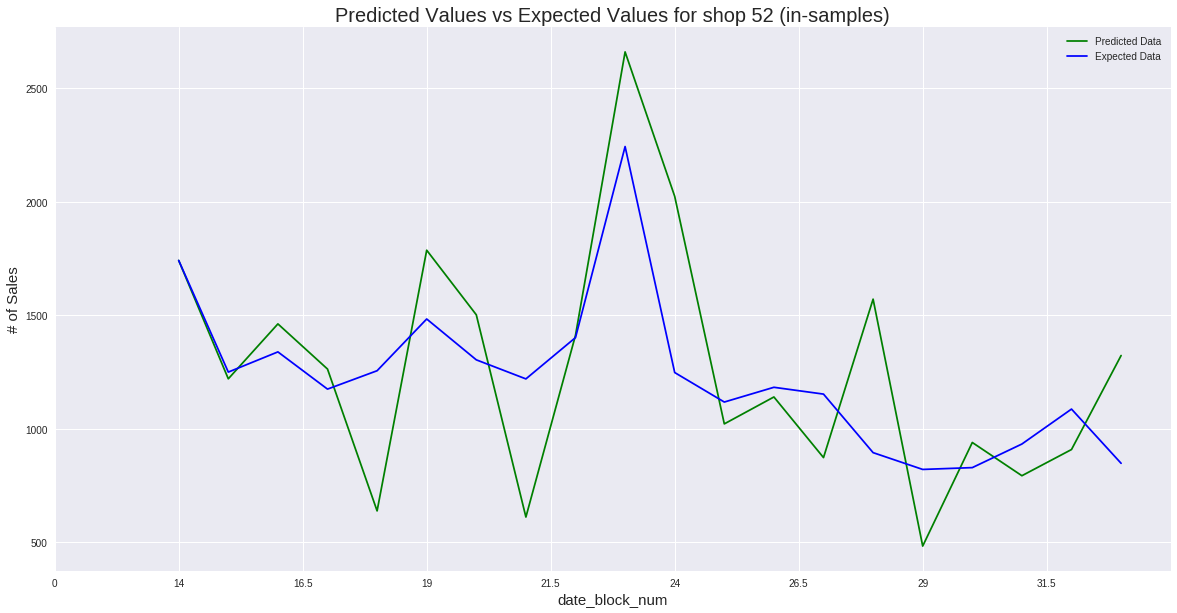

In [33]:
# Make in-sample predictions
shop_list = [shop51_sales, shop52_sales, shop53_sales, shop54_sales, shop55_sales]
in_pred = best_model_shop.predict(2)
expected_val = np.array(shop_list[1][14:])
predicted_val = np.array(in_pred)
inversed = [expected_val[i] - predicted_val[i] for i in range(0, len(predicted_val))]

# Checking RMSE of the predicted value
RMSE = math.sqrt(mean_squared_error(expected_val, inversed))
print("\n Root Mean Squared Error of ARIMA (2,2,2): %d \n" % RMSE)

# Plotting the predicted results and compare with original results
plt.figure(figsize = (20,10))
plt.title("Predicted Values vs Expected Values for shop 52 (in-samples)", fontsize = 20)
plt.plot(inversed, color = 'green', label = 'Predicted Data')
plt.plot(expected_val, color = 'blue', label = 'Expected Data')
plt.xlabel("date_block_num", fontsize = 15)
plt.ylabel("# of Sales", fontsize = 15)
locs, labels = plt.xticks()
plt.xticks(locs, labels=[0, 14, 16.5, 19, 21.5, 24, 26.5, 29, 31.5])
plt.legend(loc = 'best')
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


<Figure size 1440x720 with 0 Axes>

Text(0.5, 1.0, 'Predicted Forecast for shop 52')

Text(0.5, 0, 'date_block')

Text(0, 0.5, '# of Sales')

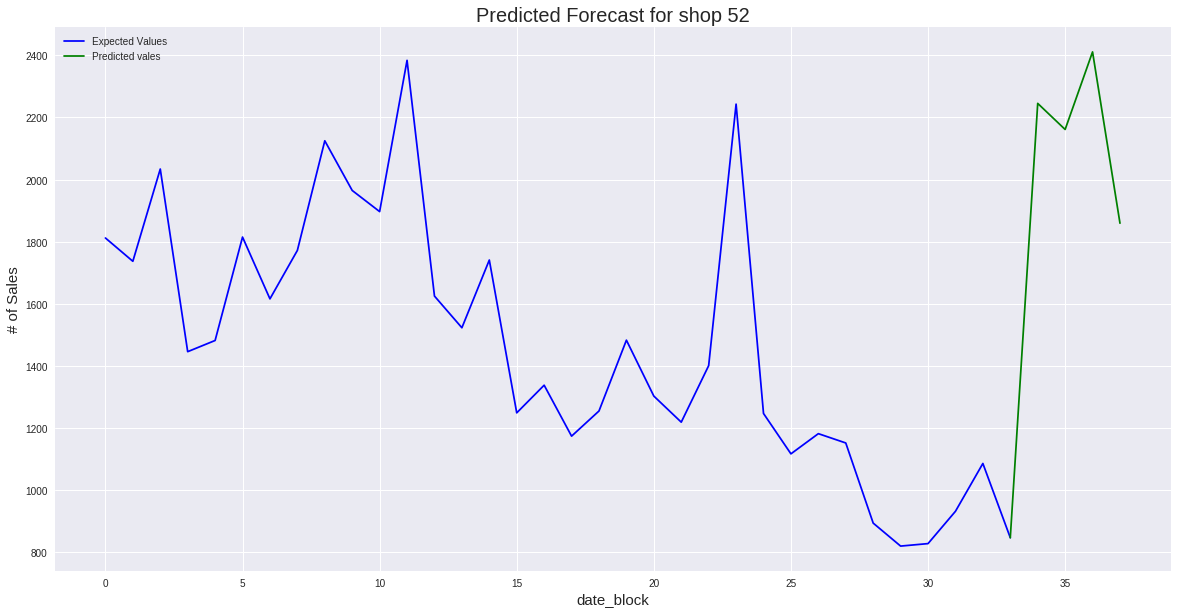

In [34]:
# Making out-sample predictions for next 4 months

# Using ARIMA.forecast() function to predict the overall sales for next 4 months within 95% confidence intervals
out_pred = best_model_shop.forecast(4)[0]
#out_pred

# inversing the predicted data
expected_val = np.array(shop_list[1])
predicted_val = np.array(out_pred)
inversed = [expected_val[i] - predicted_val[i] for i in range(0, len(predicted_val))]

extended_predicted = np.append(np.append(np.repeat(np.nan, len(expected_val) - 1), expected_val[-1]), inversed) 
# Predicted values with NaN padding to match the length of the original data
#extended_predicted 

# Plotting the forecasted values for next 4 months combined with previous original values
plt.figure(figsize = (20, 10))
plt.title("Predicted Forecast for shop 52", fontsize = 20)
plt.xlabel("date_block", fontsize = 15)
plt.ylabel("# of Sales", fontsize = 15)
plt.plot(expected_val, color = 'blue', label = 'Expected Values')
plt.plot(extended_predicted, color = 'green', label = 'Predicted vales')
plt.legend()
plt.show()

# Final Notes:

Conclusion:
---------------

- Till now we have constructed a time-series model using ARIMA, obtaining parameters that provided the lowest AIC criterion value.

- The ARIMA model predictions were conducted for the overall sales with all shops combined as well as for the individual shop with shop_id = 52.

- Since each individual shop's sales count series required differencing to some degree, obtaining the appropriate differenced series for each shop wasn't feasible even using iterations as every shop required different degrees of diffrencing.

- We plotted and compared the in-sample and out-sample observation.

- Also the Root Mean Squared Error for the predictions was calculated and reported.

Possible Enhancements:
---------

- We could make a function that could find an optimum way of differencing each shop's sales data, thereby we could go further with our analysis and predicted values as we did for shop 52.

- We could also explore the possible of available libraries like "Prophet", this could enable better parameter selections for our ARIMA model to avoid flat-lining of future predictions.